In [55]:
import sys
import glob
import json
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import SimpleITK as sitk
from medpy.io import load
from itertools import chain
import matplotlib.pyplot as plt

In [56]:
!pwd

/home/kodiak/DeepLearning/my-dl/prostate_cancer_segmentation/preparation/scope_mask_slice


In [57]:
file_list = sorted(glob('./sequence_labels/10021_1000021*'))
len(file_list)

1

In [58]:
def load_image(path_nii):
    image_data, image_header = load(path_nii)
    image_sitk = image_header.get_sitkimage()
    image_direction = image_header.get_direction()
    image_offset = image_header.get_offset()
    image_voxel_spacing = image_header.get_voxel_spacing()
    return image_data, image_sitk, image_header

In [59]:
for f_lbl in file_list[0:1]:
    lbl, _, _ = load_image(f_lbl)
    print(lbl.shape)

(9, 384, 384)


(9, 384, 384)
(9, 384, 384)
(9, 384, 384)


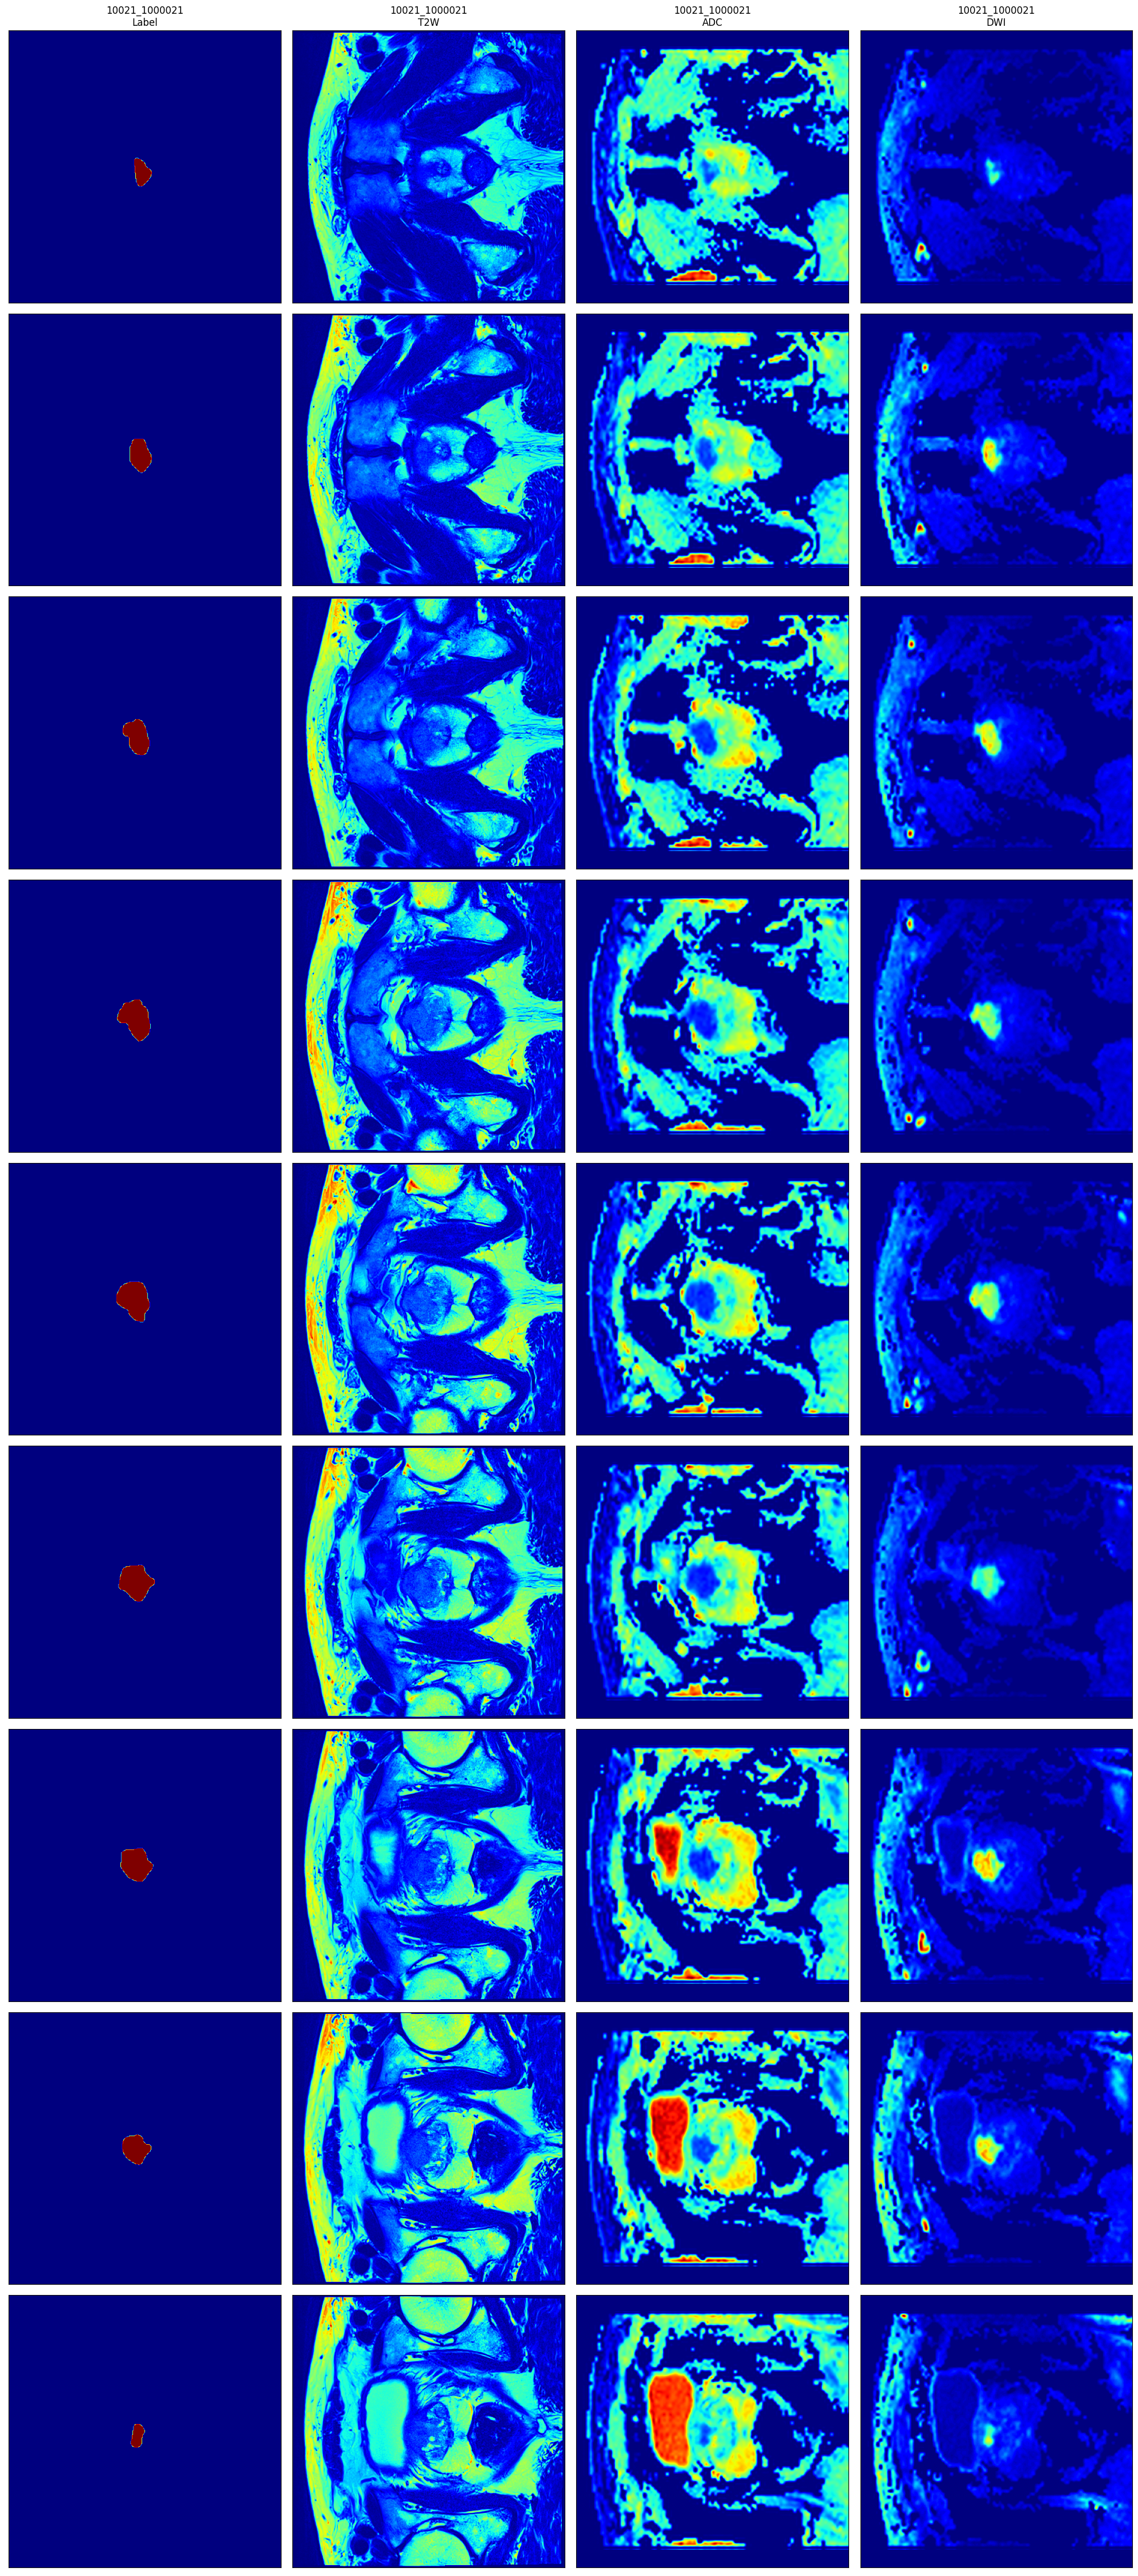

In [60]:
for f_lbl in file_list[0:1]:
    lbl, _, _ = load_image(f_lbl)
    f_img = f_lbl.replace('sequence_labels','sequence_images').replace('.nii.gz','')
    im1, _, _ = load_image(f_img + '_0000.nii.gz')
    im2, _, _ = load_image(f_img + '_0001.nii.gz')
    im3, _, _ = load_image(f_img + '_0002.nii.gz')
    
    assert (lbl.shape[2]==im1.shape[2])&(im1.shape==im2.shape)&(im2.shape==im3.shape)
    
    print(im1.shape)
    print(im2.shape)
    print(im3.shape)
    
    n_img = im1.shape[0]
    fig = plt.figure(figsize=(20,5*n_img))
    fnm = f_lbl.split('/')[-1].split('.')[0]
    for i in range(n_img):
        plt.subplot(n_img,4,i*4+1)
        plt.imshow(lbl[i,:,:], cmap='jet')
        plt.xticks([]), plt.yticks([])
        if i == 0:
            plt.title(f'{fnm}\nLabel')

        plt.subplot(n_img,4,i*4+2)
        plt.imshow(im1[i,:,:], cmap='jet')
        plt.xticks([]), plt.yticks([])
        if i == 0:
            plt.title(f'{fnm}\nT2W')

        plt.subplot(n_img,4,i*4+3)
        plt.imshow(im2[i,:,:], cmap='jet')
        plt.xticks([]), plt.yticks([])
        if i == 0:
            plt.title(f'{fnm}\nADC')

        plt.subplot(n_img,4,i*4+4)
        
        plt.imshow(im3[i,:,:], cmap='jet')
        plt.xticks([]), plt.yticks([])
        if i == 0:
            plt.title(f'{fnm}\nDWI')

    fig.tight_layout(pad=1)